# Triangulation analysis with world coordinates (Fundamental Matrix)
## Usage
This code will go through the analysis of the 3d scenes we have both in controlled setting and real setting, to investigate the 3D reconstruction efficacy of pose estimated keypoints

## Package installation
- You will need [GUI backend](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend) to enable interactive plots in `matplotlib`.
- `numpy`
- `PIL`

#### Common imports

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Part (1)

In [2]:
def get_residual(F, p1, p2):
    """
    Function to compute the residual average residual on frame 2
    param: F (3x3): fundamental matrix: (pt in frame 2).T * F * (pt in frame 1) = 0
    param: p1 (Nx2): 2d points on frame 1
    param: p2 (Nx2): 2d points on frame 2
    """
    P1 = np.c_[p1, np.ones((p1.shape[0],1))].transpose()
    P2 = np.c_[p2, np.ones((p2.shape[0],1))].transpose()
    L2 = np.matmul(F, P1).transpose()
    L2_norm = np.sqrt(L2[:,0]**2 + L2[:,1]**2)
    L2 = L2 / L2_norm[:,np.newaxis]
    pt_line_dist = np.multiply(L2, P2.T).sum(axis = 1)
    return np.mean(np.square(pt_line_dist))

def plot_fundamental(ax, F, p1, p2, I):
    """
    Function to display epipolar lines and corresponding points
    param: F (3x3): fundamental matrix: (pt in frame 2).T * F * (pt in frame 1) = 0
    param: p1 (Nx2): 2d points on frame 1
    param: p2 (Nx2): 2d points on frame 2
    param: I: frame 2
    """
    N = p1.shape[0]
    P1 = np.c_[p1, np.ones((N,1))].transpose()
    P2 = np.c_[p2, np.ones((N,1))].transpose()
    L2 = np.matmul(F, P1).transpose() # transform points from 

    # the first image to get epipolar lines in the second image
    L2_norm = np.sqrt(L2[:,0]**2 + L2[:,1]**2)
    L2 = L2 / L2_norm[:,np.newaxis]
    pt_line_dist = np.multiply(L2, P2.T).sum(axis=1)
    closest_pt = p2 - (L2[:,0:2]*pt_line_dist[:,np.newaxis])

    # Find endpoints of segment on epipolar line (for display purposes).
    # offset from the closest point is 10 pixels
    pt1 = closest_pt - np.c_[L2[:,1], -L2[:,0]]*10
    pt2 = closest_pt + np.c_[L2[:,1], -L2[:,0]]*10

    # Display points and segments of corresponding epipolar lines.
    # You will see points in red corsses, epipolar lines in green 
    # and a short cyan line that denotes the shortest distance between
    # the epipolar line and the corresponding point.
    ax.set_aspect('equal')
    ax.imshow(np.array(I))
    ax.plot(p2[:,0],p2[:,1],  '+r')
    ax.plot([p2[:,0], closest_pt[:,0]],[p2[:,1], closest_pt[:,1]], 'r')
    ax.plot([pt1[:,0], pt2[:,0]],[pt1[:,1], pt2[:,1]], 'g')

In [4]:
# write your code here for part estimating essential matrices
def fit_fundamental(matches):
    """
    Solves for the fundamental matrix using the matches with unnormalized method.
    param matches: N by 4 matrix where each row is [x, y, x', y']
    """
    # <YOUR CODE>
    
    # p1 = np.c_[p1, np.c_[p1, p1]] 
    # p2 = np.c_[p2, np.c_[p2, p2]]
    # print(p1.shape) # N by 9 
    # print(p2.shape) # N by 9


    # #[u'u, u'v, u', v'u, v'v, v', u, v, 1] ==> A
    # A = np.array([[p2[0, 0]*p1[0, 0], p2[0, 0]*p1[0, 1], p2[0, 0], p2[0,1]*p1[0,0], p2[0,1]*p1[0,1], p2[0,1], p1[0,0], p1[0,1], 1],
    #               [p2[1, 0]*p1[1, 0], p2[1, 0]*p1[1, 1], p2[1, 0], p2[1,1]*p1[1,0], p2[1,1]*p1[1,1], p2[1,1], p1[1,0], p1[1,1], 1],
    #               [p2[2, 0]*p1[2, 0], p2[2, 0]*p1[2, 1], p2[2, 0], p2[2,1]*p1[2,0], p2[2,1]*p1[2,1], p2[2,1], p1[2,0], p1[2,1], 1],
    #               [p2[3, 0]*p1[3, 0], p2[3, 0]*p1[3, 1], p2[3, 0], p2[3,1]*p1[3,0], p2[3,1]*p1[3,1], p2[3,1], p1[3,0], p1[3,1], 1],
    #               [p2[4, 0]*p1[4, 0], p2[4, 0]*p1[4, 1], p2[4, 0], p2[4,1]*p1[4,0], p2[4,1]*p1[4,1], p2[4,1], p1[4,0], p1[4,1], 1],
    #               [p2[5, 0]*p1[5, 0], p2[5, 0]*p1[5, 1], p2[5, 0], p2[5,1]*p1[5,0], p2[5,1]*p1[5,1], p2[5,1], p1[5,0], p1[5,1], 1],
    #               [p2[6, 0]*p1[6, 0], p2[6, 0]*p1[6, 1], p2[6, 0], p2[6,1]*p1[6,0], p2[6,1]*p1[6,1], p2[6,1], p1[6,0], p1[6,1], 1],
    #               [p2[7, 0]*p1[7, 0], p2[7, 0]*p1[7, 1], p2[7, 0], p2[7,1]*p1[7,0], p2[7,1]*p1[7,1], p2[7,1], p1[7,0], p1[7,1], 1]])
    
    #select 8 random points from the matches? 
    # np.random.shuffle(matches)
    # eight_points = matches[:8, :] # 8 by 4
    p1 = np.c_[matches[:, :2], np.ones((matches.shape[0],1))] #get points from img1 N by 2
    p2 = np.c_[matches[:, 2:], np.ones((matches.shape[0],1))] #get points from img2 N by 2
    u = p1[:,0]
    uprime = p2[:, 0]
    v = p1[:,1]
    vprime = p2[:, 1]

    A = np.c_[uprime*u, uprime*v, uprime, vprime*u, vprime*v, vprime, u, v, np.ones((matches.shape[0], 1))]

    #now its AF = 0 where we can do least square solution, ||AF||

    u, s, vT = np.linalg.svd(A)
    F = vT[-1].reshape(3,3)


    #Enforce rank2 
    u_, s_, vt_ = np.linalg.svd(F)
    s_[-1] = 0
    F = u_.dot(np.diag(s_).dot(vt_))
    return F / F[2,2]

def fit_fundamental_normalized(matches, I1_shape, I2_shape):
    """
    Solve for the fundamental matrix using the matches with normalized method.
    """

    # <YOUR CODE>
    # np.random.shuffle(matches)
    # eight_points = matches[:8, :] # 8 by 4
    p1 = np.c_[matches[:, :2], np.ones((matches.shape[0],1))] #get points from img1 N by 2
    p2 = np.c_[matches[:, 2:], np.ones((matches.shape[0],1))] #get points from img2 N by 2

    p1_avg = np.mean(p1, axis=0) #xavg,yavg
    p2_avg = np.mean(p2, axis=0) #xavg,yavg

    # print(f'p1avg is {p1_avg}')

    # p1 /= np.array([I1_shape[0], I1_shape[1], 1])
    # p2 /= np.array([I1_shape[0], I1_shape[1], 1])
    msd1 = np.average(np.sum(np.square(p1 - p1_avg), axis=1))
    msd2 = np.average(np.sum(np.square(p2 - p2_avg), axis=1))
    
    p1 -= np.array([p1_avg[0], p1_avg[1], 0])
    p2 -= np.array([p2_avg[0], p2_avg[1], 0])

    factor1 = np.sqrt(2 / msd1)
    factor2 = np.sqrt(2 / msd2)

    p1 *= factor1
    p2 *= factor2

    #construct T matrix does translation and the factor
    T1 = np.diag(np.array([factor1, factor1, factor1]))
    T1[2,2] = 1
    T1[0,2] = -p1_avg[0]*factor1
    T1[1,2] = -p1_avg[1]*factor1
    T2 = np.diag(np.array([factor2, factor2, factor2]))
    T2[2,2] = 1
    T2[0,2] = -p2_avg[0]*factor2
    T2[1,2] = -p2_avg[1]*factor2

    # A = np.array([[p2[0, 0]*p1[0, 0], p2[0, 0]*p1[0, 1], p2[0, 0], p2[0,1]*p1[0,0], p2[0,1]*p1[0,1], p2[0,1], p1[0,0], p1[0,1], 1],
    #             [p2[1, 0]*p1[1, 0], p2[1, 0]*p1[1, 1], p2[1, 0], p2[1,1]*p1[1,0], p2[1,1]*p1[1,1], p2[1,1], p1[1,0], p1[1,1], 1],
    #             [p2[2, 0]*p1[2, 0], p2[2, 0]*p1[2, 1], p2[2, 0], p2[2,1]*p1[2,0], p2[2,1]*p1[2,1], p2[2,1], p1[2,0], p1[2,1], 1],
    #             [p2[3, 0]*p1[3, 0], p2[3, 0]*p1[3, 1], p2[3, 0], p2[3,1]*p1[3,0], p2[3,1]*p1[3,1], p2[3,1], p1[3,0], p1[3,1], 1],
    #             [p2[4, 0]*p1[4, 0], p2[4, 0]*p1[4, 1], p2[4, 0], p2[4,1]*p1[4,0], p2[4,1]*p1[4,1], p2[4,1], p1[4,0], p1[4,1], 1],
    #             [p2[5, 0]*p1[5, 0], p2[5, 0]*p1[5, 1], p2[5, 0], p2[5,1]*p1[5,0], p2[5,1]*p1[5,1], p2[5,1], p1[5,0], p1[5,1], 1],
    #             [p2[6, 0]*p1[6, 0], p2[6, 0]*p1[6, 1], p2[6, 0], p2[6,1]*p1[6,0], p2[6,1]*p1[6,1], p2[6,1], p1[6,0], p1[6,1], 1],
    #             [p2[7, 0]*p1[7, 0], p2[7, 0]*p1[7, 1], p2[7, 0], p2[7,1]*p1[7,0], p2[7,1]*p1[7,1], p2[7,1], p1[7,0], p1[7,1], 1]])

    u = p1[:,0]
    uprime = p2[:, 0]
    v = p1[:,1]
    vprime = p2[:, 1]

    A = np.c_[uprime*u, uprime*v, uprime, vprime*u, vprime*v, vprime, u, v, np.ones((matches.shape[0], 1))]

    #now its AF = 0 where we can do least square solution, ||AF||

    u, s, vT = np.linalg.svd(A)
    F = vT[-1].reshape(3,3)

    #Enforce rank2 
    u_, s_, vt_ = np.linalg.svd(F)
    s_[-1] = 0
    F = u_.dot(np.diag(s_).dot(vt_))

    return T2.T @ F @ T1

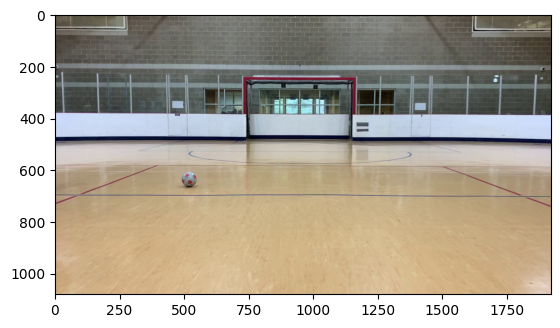

In [19]:
# Fundamental matrix estimation
name = 'example_files/library' 

vid_type = input("Please insert your desired video type, either (0) studio or (1) real (futsal) setting:")

if(int(vid_type) == 1):
    vid = input("Input video numbers ranged 674 - 692")
    vid = int(vid)
    if(vid % 1 != 0 or vid > 692 or vid < 674):
        print("invalid video number")
    else:
        vid1 = str(vid)
        vid2 = str(vid+1684)

        I1 = Image.open('revised_videos/frames/0' + vid1 + '_frames/f0001.jpg')
        I2 = Image.open('revised_videos/frames/' + vid2 + '_frames/f0001.jpg')
        matches = np.loadtxt('./{:s}_matches.txt'.format(name))

        ## matches are in the format of (I1 key point, I2 keypoint)

        N = len(matches)

        plt.imshow(I1)

elif(int(vid_type) == 0 ):
    print('not available')

In [20]:
def read_text(dir):
    f = open(dir, 'r')
    coordinates = np.zeros((8,2))
    for idx, line in enumerate(f):
        x, y = line.split(',')
        coordinates[idx][0] = float(x)
        coordinates[idx][1] = float(y)

    return coordinates

def create_match_text(dir1, dir2, output):
    coord1 = read_text("background_keypoints_angle1.txt")
    coord2 = read_text("background_keypoints_angle2.txt")
    
    match_coordinates = np.zeros((8,4))
    f = open(output, 'w')
    for i in range(8):
        f.write(str(coord1[i][0])+ " " + str(coord1[i][1])+ " " + str(coord2[i][0]) + " " + str(coord2[i][1])+ "\n")
        # x, y = line.split(',')
        # coordinates[idx][0] = float(x)
        # coordinates[idx][1] = float(y)

    return 


create_match_text("background_keypoints_angle1.txt", "background_keypoints_angle2.txt", "custom_match.txt")

matches = np.loadtxt("custom_match.txt")

example_files/library: residual in frame 2 (non-normalized method) =  730.1863223905536
example_files/library: residual in frame 1 (non-normalized method) =  559.1997066642983
example_files/library: residual combined   (non-normalized method) =  644.6930145274259
Fundamental matrix without normalization 
 [[ 1.60248012e-07  2.68895222e-06 -1.17052696e-03]
 [ 5.38593161e-07 -3.15807914e-06 -5.22684792e-03]
 [-6.13415516e-05  4.17771519e-03  1.00000000e+00]]

Fundamental matrix with normalization 
 [[ 4.12125221e-08  1.10528372e-06 -5.09560410e-04]
 [ 2.45633866e-07 -1.29919478e-06 -2.14978947e-03]
 [-6.84479777e-05  1.71999561e-03  4.46285244e-01]]
example_files/library: residual in frame 2 (normalized method) =  4.239294020822158
example_files/library: residual in frame 1 (normalized method) =  9.689144411516025
example_files/library: residual combined   (normalized method) =  6.9642192161690915


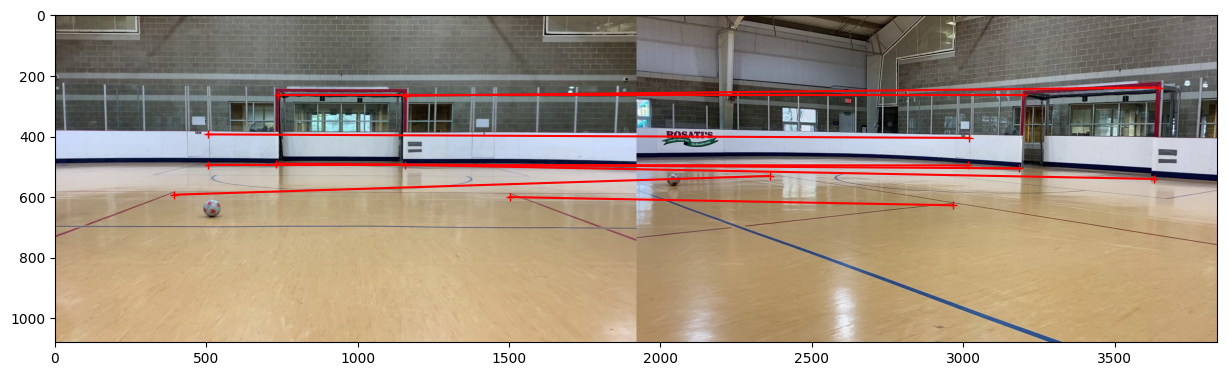

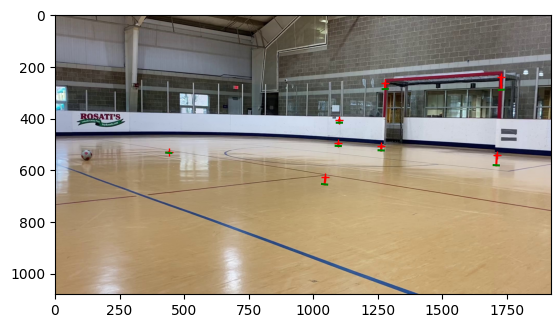

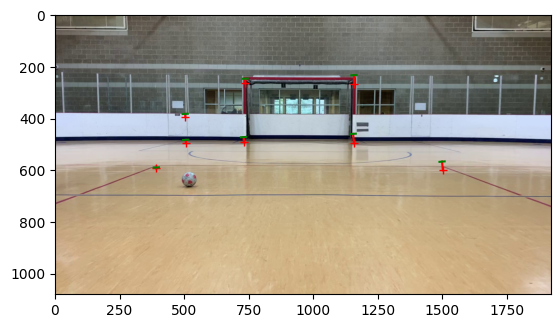

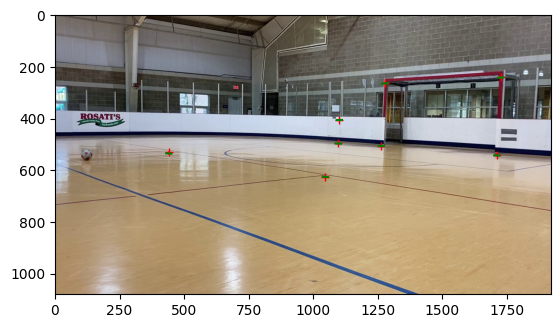

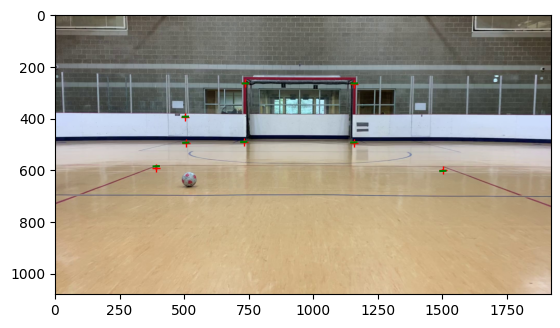

In [21]:
## Display two images side-by-side with matches
## this code is to help you visualize the matches, you don't need
## to use it to produce the results for the assignment
I3 = np.zeros((I1.size[1],I1.size[0]*2,3))
I3[:,:I1.size[0],:] = I1
I3[:,I1.size[0]:,:] = I2
fig, ax = plt.subplots(figsize=(15,10))
ax.set_aspect('equal')
ax.plot(matches[:,0],matches[:,1],  '+r')
ax.plot( matches[:,2]+I1.size[0],matches[:,3], '+r')
ax.plot([matches[:,0], matches[:,2]+I1.size[0]],[matches[:,1], matches[:,3]], 'r')
ax.imshow(np.array(I3).astype(np.uint8))

# non-normalized method
F = fit_fundamental(matches) # <YOUR CODE>
pt1_2d = matches[:, :2]
pt2_2d = matches[:, 2:]
v2 = get_residual(F, pt1_2d, pt2_2d)
v1 = get_residual(F.T, pt2_2d, pt1_2d)
print('{:s}: residual in frame 2 (non-normalized method) = '.format(name), v2)
print('{:s}: residual in frame 1 (non-normalized method) = '.format(name), v1)
print('{:s}: residual combined   (non-normalized method) = '.format(name), (v1+v2)/2)
# Plot epipolar lines in image I2
fig, ax = plt.subplots()
plot_fundamental(ax, F, pt1_2d, pt2_2d, I2)
# Plot epipolar lines in image I1
fig, ax = plt.subplots()
plot_fundamental(ax, F.T, pt2_2d, pt1_2d, I1)
print(f'Fundamental matrix without normalization \n {F}')

# normalized method
F = fit_fundamental_normalized(matches, I1.size, I2.size) # <YOUR CODE>
print("")
print(f'Fundamental matrix with normalization \n {F}')

pt1_2d = matches[:, :2]
pt2_2d = matches[:, 2:]
v2 = get_residual(F, pt1_2d, pt2_2d)
v1 = get_residual(F.T, pt2_2d, pt1_2d)
print('{:s}: residual in frame 2 (normalized method) = '.format(name), v2)
print('{:s}: residual in frame 1 (normalized method) = '.format(name), v1)
print('{:s}: residual combined   (normalized method) = '.format(name), (v1+v2)/2)
# Plot epipolar lines in image I2
fig, ax = plt.subplots()
plot_fundamental(ax, F, pt1_2d, pt2_2d, I2)
# Plot epipolar lines in image I1
fig, ax = plt.subplots()
plot_fundamental(ax, F.T, pt2_2d, pt1_2d, I1)

#### Part (2)

In [23]:
def evaluate_points(M, points_2d, points_3d):
    """
    Visualize the actual 2D points and the projected 2D points calculated from
    the projection matrix
    You do not need to modify anything in this function, although you can if you
    want to
    :param M: projection matrix 3 x 4
    :param points_2d: 2D points N x 2
    :param points_3d: 3D points N x 3
    :return:
    """
    N = len(points_3d)
    points_3d = np.hstack((points_3d, np.ones((N, 1))))
    points_3d_proj = np.dot(M, points_3d.T).T
    u = points_3d_proj[:, 0] / points_3d_proj[:, 2]
    v = points_3d_proj[:, 1] / points_3d_proj[:, 2]
    residual = np.sum(np.hypot(u-points_2d[:, 0], v-points_2d[:, 1]))
    points_3d_proj = np.hstack((u[:, np.newaxis], v[:, np.newaxis]))
    return points_3d_proj, residual

# Write your code here for camera calibration (lab)
def camera_calibration(matches, pts_3d):
    """
    write your code to compute camera matrix
    """
    # <YOUR CODE>
    #matches 20 by 4
    #pts_3d 20 by 3

    #[0,0,0,x,y,z,-xy',-yy',-zy']
    #[x,y,z,0,0,0,-xx',-yx',-zx']

    first = np.array([0, 0, 0, 0, pts_3d[0, 0], pts_3d[0, 1], pts_3d[0, 2], 1, -matches[0, 1]*pts_3d[0, 0], -matches[0, 1]*pts_3d[0, 1], -matches[0, 1]*pts_3d[0, 2], -matches[0, 1]])
    second = np.array([pts_3d[0, 0], pts_3d[0, 1], pts_3d[0, 2], 1, 0, 0, 0, 0, -matches[0, 0]*pts_3d[0, 0], -matches[0, 0]*pts_3d[0, 1], -matches[0, 0]*pts_3d[0, 2], -matches[0, 0]])
    A = np.r_[[first], [second]]
    
    for n in range(1, matches.shape[0]):
        first = np.array([0, 0, 0, 0, pts_3d[n, 0], pts_3d[n, 1], pts_3d[n, 2], 1, -matches[n, 1]*pts_3d[n, 0], -matches[n, 1]*pts_3d[n, 1], -matches[n, 1]*pts_3d[n, 2], -matches[n, 1]])
        second = np.array([pts_3d[n, 0], pts_3d[n, 1], pts_3d[n, 2], 1, 0, 0, 0, 0, -matches[n, 0]*pts_3d[n, 0], -matches[n, 0]*pts_3d[n, 1], -matches[n, 0]*pts_3d[n, 2], -matches[n, 0]])
        A = np.r_[A, [first], [second]]

    u_, sig_, vt_ = np.linalg.svd(A)

    v = vt_[-1, :]
    v /= v[-1]

    return v.reshape(3,4)

    pass


# Load 3D points, and their corresponding locations in 
# the two images.
pts_3d = np.loadtxt('./futsal_court3d.txt')
matches = np.loadtxt('./custom_match.txt')

# <YOUR CODE> print lab camera projection matrices:
lab1_camera_proj = camera_calibration(matches[:, :2], pts_3d)
lab2_camera_proj = camera_calibration(matches[:, 2:], pts_3d)
print('lab 1 camera projection')
print(lab1_camera_proj)

print('')
print('lab 2 camera projection')
print(lab2_camera_proj)

# <YOUR CODE> evaluate the residuals for both estimated cameras
_, lab1_res = evaluate_points(lab1_camera_proj, matches[:, :2], pts_3d)
print('residuals between the observed 2D points and the projected 3D points:')
print('residual in lab1:', lab1_res)
_, lab2_res = evaluate_points(lab2_camera_proj, matches[:, 2:], pts_3d)
print('residual in lab2:', lab2_res)

lab 1 camera projection
[[-8.82874056e+00 -4.79788871e+00 -3.02414363e-01  8.55841780e+02]
 [-3.45274558e-01 -2.08382836e+00  7.33048334e+00  1.08554140e+02]
 [-6.68814493e-04 -5.18578809e-03 -1.84459703e-04  1.00000000e+00]]

lab 2 camera projection
[[-5.97861987e+01 -2.34125470e+02 -1.29951100e+01  8.42083979e+04]
 [ 3.34026467e+01 -4.13224205e+01  1.96221042e+02 -4.38724732e+03]
 [ 9.05512035e-02 -9.07540121e-02 -1.38358799e-03  1.00000000e+00]]
residuals between the observed 2D points and the projected 3D points:
residual in lab1: 34.54568601442378
residual in lab2: 17.412682735464582


In [24]:
# lib1_proj = np.loadtxt('./library1_camera.txt')
# lib2_proj = np.loadtxt('./library2_camera.txt')
# print('library1 camera projection')
# print(lib1_proj)
# print('library2 camera projection')
# print(lib2_proj)

#### Part (3)

In [25]:
a = np.array([[-1,3,2],[1,1,0],[1,1,0]])

u, s, vt = np.linalg.svd(a)

2*vt[-1]/vt[-1,-1]

array([ 1., -1.,  2.])

In [26]:
# Write your code here for computing camera centers
def calc_camera_center(camera_projection):
    """
    write your code to get camera center in the world 
    from the projection matrix
    """
    # <YOUR CODE>

    #camera center is the nullspace of the camera projection matrix 
    u,s,vt = np.linalg.svd(camera_projection)

    return vt[-1] / vt[-1,-1]
    pass

# <YOUR CODE> compute the camera centers using 
# the projection matrices
lab1_c = calc_camera_center(lab1_camera_proj)
lab2_c = calc_camera_center(lab2_camera_proj)
print('lab1 camera center', lab1_c)
print('lab2 camera center', lab2_c)

# # <YOUR CODE> compute the camera centers with the projection matrices
# lib1_c = calc_camera_center(lib1_proj)
# lib2_c = calc_camera_center(lib2_proj)
# print('library1 camera center', lib1_c)
# print('library2 camera center', lib2_c)

lab1 camera center [ -9.082123   192.60052754  39.51396692   1.        ]
lab2 camera center [277.08277795 286.93936443  35.61788376   1.        ]


#### Part (4)

In [27]:
def triangulation(matches, proj_m1, proj_m2):
    """
    write your code to triangulate the points in 3D
    """
    # <YOUR CODE>
    #take in matches which is an N by 4 matrix, where N is the number of matched points, and along the row 
    #it is ordered as x1, y1, x2, y2 where 1 and 2 means image 1 and image 2
    # x1 cross P1@X --> A1 = [x1]P1
    # x2 cross P2@X --> A2 = [x2]P2 
    #...objective is to find big X or where the original point in 3D is

    #where x1 is the points in image 1 and x2 is the points in image 2
    #using linear approach
    first_points = np.c_[matches[:, :2], np.ones((matches[:, :2].shape[0], 1))] #N by 3
    second_points = np.c_[matches[:, 2:], np.ones((matches[:, :2].shape[0], 1))] #N by 3

    estimated_3d_pts = []
    for n in range(matches.shape[0]):
        x1 = matches[n, 0] # 1 x 1
        y1 = matches[n, 1] # 1 x 1
        p11 = proj_m1[0, :]
        p12 = proj_m1[1, :] # 1 x 4    
        p13 = proj_m1[2, :] # 1 x 4
        x1p3 = x1*p13 # 1 x 4
        y1p3 = y1*p13 # 1 x 4
        equation1 = y1p3 - p12 # 1 x 4
        equation2 = p11 - x1p3 # 1 x 4
        
        # second_points
        x2 = matches[n, 2]
        y2 = matches[n, 3]
        p21 = proj_m2[0, :]
        p22 = proj_m2[1, :] # 1 x 4    
        p23 = proj_m2[2, :] # 1 x 4
        x2p3 = x2*p23 # 1 x 4
        y2p3 = y2*p23 # 1 x 4
        equation3 = y2p3 - p22 # 1 x 4
        equation4 = p21 - x2p3 # 1 x 4
        A = np.r_[[equation1], [equation2], [equation3], [equation4]]
        u_, s_, vt_ = np.linalg.svd(A)

        v = vt_[-1] / vt_[-1, -1]

        estimated_3d_pts.append(list(v[:3]))

    #return X 
    return np.array(estimated_3d_pts)

def evaluate_points_3d(ground_truth, estimated):
    """
    write your code to evaluate the triangulated 3D points
    """
    # <YOUR CODE>
    return np.sqrt(np.sum(np.square(ground_truth - estimated), axis=1))

(8, 4)
Mean 3D reconstuction error for the lab data:  1.07798
2D reprojection error for the lab 1 data:  18.812587444124055
2D reprojection error for the lab 2 data:  0.027785424568730975


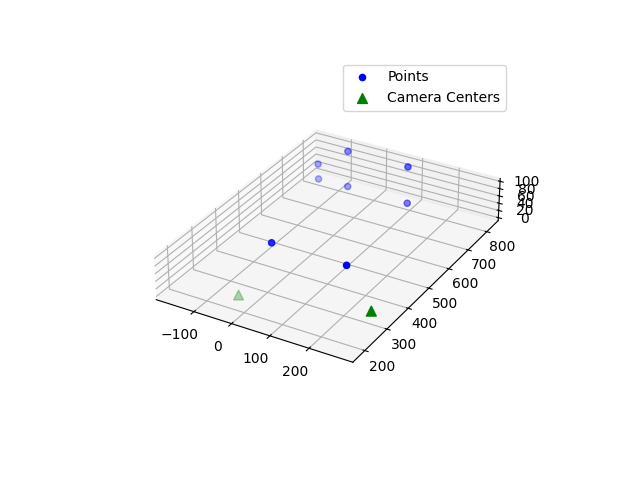

In [28]:
%matplotlib widget
# triangulate the 3D point cloud for the lab data 
matches_lab = np.loadtxt('./custom_match.txt')
print(matches_lab.shape)
points_3d_gt = np.loadtxt('./futsal_court3d.txt')
points_3d_lab = triangulation(matches_lab, lab1_camera_proj, lab2_camera_proj) # <YOUR CODE>
res_3d_lab = evaluate_points_3d(points_3d_gt, points_3d_lab) # <YOUR CODE>
print('Mean 3D reconstuction error for the lab data: ', round(np.mean(res_3d_lab), 5))

lab_pt1 = matches_lab[:, :2]
lab_pt2 = matches_lab[:, 2:]
_, res_2d_lab1 = evaluate_points(lab1_camera_proj, lab_pt1, points_3d_lab)
_, res_2d_lab2 = evaluate_points(lab2_camera_proj, lab_pt2, points_3d_lab)
print('2D reprojection error for the lab 1 data: ', np.mean(res_2d_lab1))
print('2D reprojection error for the lab 2 data: ', np.mean(res_2d_lab2))
# visualization of lab point cloud
camera_centers = np.vstack((lab1_c, lab2_c))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d_lab[:, 0], points_3d_lab[:, 1], points_3d_lab[:, 2], c='b', label='Points')
ax.scatter(camera_centers[:, 0], camera_centers[:, 1], camera_centers[:, 2], c='g', s=50, marker='^', label='Camera Centers')
ax.legend(loc='best')
ax.set_aspect('equal')


# # triangulate the 3D point cloud for the library data
# matches_lib = np.loadtxt('./library_matches.txt')
# points_3d_lib = triangulation(matches_lib, lib1_proj, lib2_proj) # <YOUR CODE>
# lib_pt1 = matches_lib[:, :2]
# lib_pt2 = matches_lib[:, 2:]

# _, res_2d_lib1 = evaluate_points(lib1_proj, lib_pt1, points_3d_lib)
# _, res_2d_lib2 = evaluate_points(lib2_proj, lib_pt2, points_3d_lib)
# print('2D reprojection error for the library 1 data: ', np.mean(res_2d_lib1))
# print('2D reprojection error for the library 2 data: ', np.mean(res_2d_lib2))
# # visualization of library point cloud
# camera_centers_library = np.vstack((lib1_c, lib2_c))
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(points_3d_lib[:, 0], points_3d_lib[:, 1], points_3d_lib[:, 2], c='b', label='Points')
# ax.scatter(camera_centers_library[:, 0], camera_centers_library[:, 1], 
#            camera_centers_library[:, 2], c='g', s=90, 
#            marker='^', label='Camera Centers')
# ax.view_init(azim=-45, elev=45)
# ax.legend(loc='best')

# print(f'points_3d_gt is {points_3d_gt}')
# print(f'points estimated is {points_3d_lab}')

In [29]:
import json 
def load_keypoints(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return [np.array(frame['keypoints'][0]) for frame in data if frame['keypoints']]


In [30]:
json_file1 = 'revised_videos/keypoints/IMG_0676.json'
json_file2 = 'revised_videos/keypoints/IMG_2360.json'
keypoints1 = load_keypoints(json_file1)
keypoints2 = load_keypoints(json_file2)
pose3d = [] 
num_frames = min(len(keypoints1), len(keypoints2))
print(f"frame number is {num_frames}")
for f in range(num_frames):
    pose_keypoint_matches = np.c_[keypoints1[f], keypoints2[f]]
    pose3d.append(triangulation(pose_keypoint_matches, lab1_camera_proj, lab2_camera_proj))

#pose3d should have the shape (#frame, 17, 3)

frame number is 76


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Write your code here for triangulation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

Display the animation in just one frame

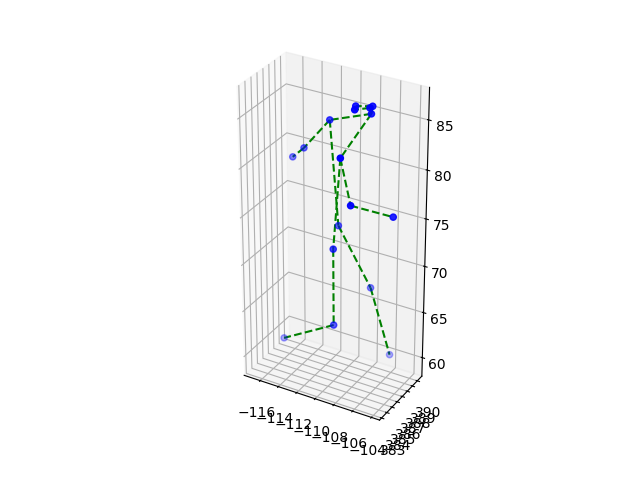

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
frame = 10
ax.scatter(pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2], c='b', label='Points')
connections = [(0,1), (1,3), (0,2), (2,4), (0,5), (0,6), (5,7), (7,9), (6,8), (8,10), 
(5,11), (11,13), (13,15), (6,12), (12,14), (14,16)]

for start_idx, end_idx in connections:
    start_point = pose3d[frame][start_idx]
    end_point = pose3d[frame][end_idx]
    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], [start_point[2], end_point[2]], color='green', linestyle='--')

ax.set_aspect('equal')

In [33]:
pose3d

[array([[-113.91382914,  384.62631395,   82.3791919 ],
        [-113.84445261,  384.51048964,   81.70714497],
        [-114.105524  ,  384.60129451,   82.30318787],
        [-113.48911636,  384.31218302,   82.40549547],
        [-114.23875113,  384.64365302,   81.92490503],
        [-113.9609157 ,  384.71362389,   80.10373442],
        [-113.94732459,  384.85220968,   79.91565595],
        [-113.95261309,  384.79731733,   77.58470775],
        [-113.94728184,  384.78946749,   77.1325115 ],
        [-114.05465384,  384.96932046,   74.63421526],
        [-114.08134794,  384.96879988,   74.98994884],
        [-113.88872567,  384.84899603,   72.57310953],
        [-113.85304319,  384.97699137,   72.77715151],
        [-113.90944165,  385.08677833,   67.10676167],
        [-113.97883431,  385.10740772,   67.15972705],
        [-113.88264253,  385.27891732,   61.96403482],
        [-113.92679369,  385.30987319,   62.50716983]]),
 array([[-112.63820396,  384.24147356,   84.42462081],
        

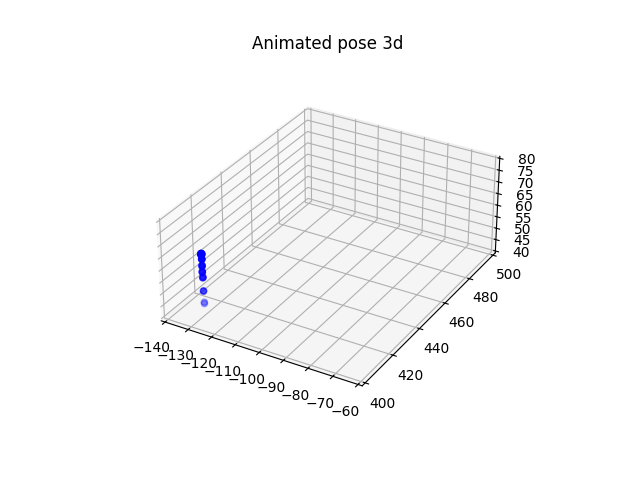

IndexError: list index out of range

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7f4def77add0>>
Traceback (most recent call last):
  File "/home/junryuf2/.pyenv/versions/3.10.12/envs/cs543/lib/python3.10/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
  File "/home/junryuf2/.pyenv/versions/3.10.12/envs/cs543/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 1233, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/junryuf2/.pyenv/versions/3.10.12/envs/cs543/lib/python3.10/site-packages/matplotlib/animation.py", line 1427, in _step
    still_going = super()._step(*args)
  File "/home/junryuf2/.pyenv/versions/3.10.12/envs/cs543/lib/python3.10/site-packages/matplotlib/animation.py", line 1121, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/junryuf2/.pyenv/versions/3.10.12/envs/cs543/lib/python3.10/site-packages/matplotlib/animation.py", line 114

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate some sample data for demonstration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initial frame
frame = 0
scat = ax.scatter(pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2], c='b', label='Points')

# Define connections between points
connections = [(0, 1), (1, 3), (0, 2), (2, 4), (0, 5), (0, 6), (5, 7), (7, 9), (6, 8), (8, 10), 
               (5, 11), (11, 13), (13, 15), (6, 12), (12, 14), (14, 16)]

lines = [ax.plot([], [], [], color='green', linestyle='--')[0] for _ in range(len(connections))]

def update(frame):
    scat._offsets3d = (pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2])
    for i, (start_idx, end_idx) in enumerate(connections):
        start_point = pose3d[frame][start_idx]
        end_point = pose3d[frame][end_idx]
        lines[i].set_data([start_point[0], end_point[0]], [start_point[1], end_point[1]])
        lines[i].set_3d_properties([start_point[2], end_point[2]])
    return scat, lines

x_min, x_max = -140, -60
y_min, y_max = 400, 500
z_min, z_max = 40, 80

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_title('Animated pose 3d')
ax.set_aspect('equal')
ani = FuncAnimation(fig, update, frames=100, interval=50)
plt.show()
ani.save('3d_pose_prototype.mp4', writer='ffmpeg', fps=20)

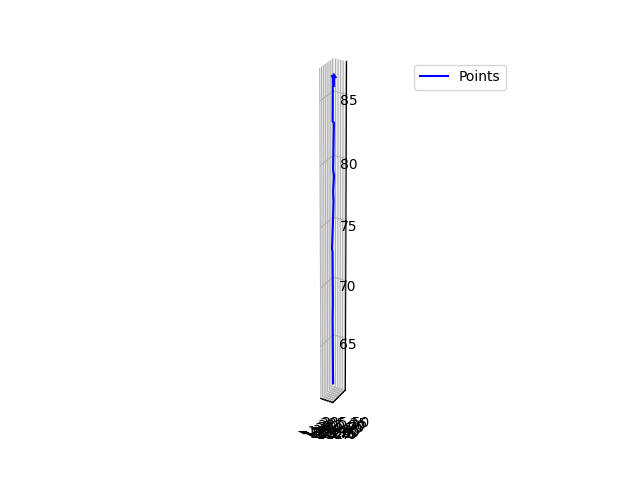

AttributeError: 'list' object has no attribute 'set_data'

In [ ]:
# def init():
#     scat.set_data(pose3d[0][:, 0], pose3d[0][:, 1])
#     scat.set_3d_properties(pose3d[0][:, 2])
#     return scat,

# def frame_update(frame):
#     x = pose3d[frame][:, 0]
#     y = pose3d[frame][:, 1]
#     z = pose3d[frame][:, 2]
#     scat.set_data(x, y)
#     scat.set_3d_properties(z)
#     return scat

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# scat = [ax.scatter(all_3d_points[0, 0, i], all_3d_points[0, 1, i], all_3d_points[0, 2, i]) for i in range(17)]
# scat = ax.plot(pose3d[0][:, 0], pose3d[0][:, 1], pose3d[0][:, 2], c='b', label='Points')
# # ax.scatter(camera_centers[:, 0], camera_centers[:, 1], camera_centers[:, 2], c='g', s=50, marker='^', label='Camera Centers')

# ax.legend(loc='best')
# ax.set_aspect('equal')
# anim = animation.FuncAnimation(fig, frame_update, init_func = init, frames = 100, interval = 1, blit = True)


In [ ]:
# from numpy import linspace
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# from scipy import signal

# fig = plt.figure(figsize = (8,8))
# ax = plt.axes(projection='3d')

# t = np.linspace(0, 1, 1000, endpoint=True)
# ax.plot3D(t, signal.square(2 * np.pi * 5 * t))

# for angle in range(0, 360):
#     ax.view_init(angle,30)
#     plt.draw()
#     plt.pause(.001)


In [27]:

# def filter_limits(points, lower_percentile=5, upper_percentile=95):
#     """Compute axis limits that exclude extreme outliers."""
#     p_low = np.percentile(points, lower_percentile)
#     p_high = np.percentile(points, upper_percentile)
#     return p_low, p_high
# all_3d_points = np.dstack(pose3d)  #  (N_frames, 17, 3)
# # print(f'all3dpoints is {all_3d_points.shape}')
# all_3d_points = np.transpose(all_3d_points, (2, 1, 0))  # (3, 17, N_frames)


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')


# # percentile filter to axis limits
# x_min, x_max = filter_limits(all_3d_points[0])
# y_min, y_max = filter_limits(all_3d_points[1])
# z_min, z_max = filter_limits(all_3d_points[2])


# ax.set_xlim([x_min, x_max])
# ax.set_ylim([y_min, y_max])
# ax.set_zlim([z_min, z_max])


# # remove axis
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
# ax.set_aspect('equal')


# scatters = [ax.scatter(all_3d_points[0, 0, i], all_3d_points[0, 1, i], all_3d_points[0, 2, i]) for i in range(17)]


# def update(num, data, scatters, ax):
#     for i, sc in enumerate(scatters):
#         sc._offsets3d = (data[num:num+1, 0, i], data[num:num+1, 1, i], data[num:num+1, 2, i])


#     # Dynamically adjust axes limits
#     current_data = data[num, :, :]
#     x_min, x_max = filter_limits(current_data[0])
#     y_min, y_max = filter_limits(current_data[1])
#     z_min, z_max = filter_limits(current_data[2])
#     ax.set_xlim([x_min, x_max])
#     ax.set_ylim([y_min, y_max])
#     ax.set_zlim([z_min, z_max])


#     return scatters


# # Modify the FuncAnimation call to include ax as a part of fargs
# ani = animation.FuncAnimation(fig, update, frames=len(pose3d), fargs=(all_3d_points, scatters, ax), repeat=True)


# plt.legend(loc='upper left')
# # ani.save('3D_points_motion.mp4', writer='ffmpeg', fps=20)